In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from time import time

read = pd.read_csv("beer_reviews/test.csv")

In [16]:
read = read[["brewery_name", 
            "review_overall", 
            "review_aroma", 
            "review_appearance", 
            "beer_style", 
            "review_palate",
            "review_taste",
            "beer_name",
            "beer_abv"]]

#print read[:10]
reviews = read.as_matrix()

#cerrar read pero no lo encontre xd

In [17]:
print type(reviews)
print reviews[0]
print len(reviews)
print reviews[:10,[2,5]]

<type 'numpy.ndarray'>
['Vecchio Birraio' 1.5 2.0 2.5 'Hefeweizen' 1.5 1.5 'Sausa Weizen' 5.0]
316
[[2.0 1.5]
 [2.5 3.0]
 [2.5 3.0]
 [3.0 2.5]
 [4.5 4.0]
 [3.5 3.0]
 [3.5 4.0]
 [2.5 2.0]
 [3.0 3.5]
 [3.5 4.0]]


nota: no usar ni el 100% ni el 10% del dataset, dead memory

In [13]:
print "conjunto de valores de over_all"
asd = set()
for y in reviews[:,[1]] : #review over_all
    asd.add(y[0])
print asd

n = len(reviews) * 0.01
print int(n)

brewery = set()
for y in reviews[:int(n),[0]] : #review over_all
    brewery.add(y[0])
print len(brewery)

conjunto de valores de over_all
set([1.5, 3.5, 2.0, 3.0, 4.0, 5.0, 4.5, 2.5])
3
1


In [14]:
from sklearn.cluster import KMeans

data = [reviews[:int(n),[2,3]], reviews[:int(n),[2,5]], reviews[:int(n),[2,6]], 
        reviews[:int(n),[3,5]], reviews[:int(n),[3,6]], reviews[:int(n),[1,2]]]
labels =[["Aroma", "Apariencia"],["Aroma", "Palate"],["Aroma", "Taste"],
         ["Apariencia", "Palate"], ["Apariencia", "Taste"],["Overall", "Aroma"]]

tiempo = 0

#Vizualitation
fig = plt.figure(figsize = (10,10))

for X,i in zip(data, range(6)):
    start_time = time()

    k_means = KMeans( init="k-means++", n_clusters = 11, n_init = 2)#, tol=0.0001, max_iter=30)
    k_means.fit(X)

    final_time = time() - start_time
    tiempo += final_time
    k_means_labels = k_means.labels_
    
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    #X = (X - x_min) / (x_max - x_min)

    ax = fig.add_subplot(2,3,i+1)
    ax.set_xlabel(labels[i][0])
    ax.set_ylabel(labels[i][1])
    plt.title("Grafico "+ str(i+1) )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 5.05, 0, 5.05])

    #Visualitation (in 2D).
    print X.shape[0]
    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], "o",
        color=plt.cm.spectral(k_means_labels[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})

print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()

ValueError: n_samples=3 should be >= n_clusters=11

In [ ]:
#Minibatch nacho
from sklearn.cluster import MiniBatchKMeans

#Data creation
data = [reviews[:10000,[2,3]], reviews[:10000,[2,5]], reviews[:10000,[2,6]], 
        reviews[:10000,[3,5]], reviews[:10000,[3,6]], reviews[:10000,[1,2]]]
labels =[["Aroma", "Apariencia"],["Aroma", "Palate"],["Aroma", "Taste"],
         ["Apariencia", "Palate"], ["Apariencia", "Taste"],["Overall", "Aroma"]]

tiempo = 0
#Vizualitation
fig = plt.figure(figsize = (10,10))
fig.suptitle('MiniBatchKMeans (Cero = setosa, Uno = versicolor, Dos = virginica)')

#Running K-Means
for X,i in zip(data, range(6)):
    start_time = time()
    #print X
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, n_init=10)#, max_no_improvement=20, batch_size=50, reassignment_ratio=0.2)
    mbk.fit(X)
    
    final_time = time() - start_time
    tiempo += final_time
    mbk_labels = mbk.labels_

    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
   # X = (X - x_min) / (x_max - x_min)
    
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xlabel(labels[i][0])
    ax.set_ylabel(labels[i][1])
    plt.title("Grafico "+ str(i+1) )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 5.05, 0, 5.05])

    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], "o",
        color=plt.cm.spectral(mbk_labels[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})


print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()
 

In [ ]:
print "conjunto de valores de over_all"
asd = set()
for y in reviews[:,[1]] : #review over_all
    asd.add(y[0])
print asd

In [ ]:
# Setting
from sklearn.cluster import AgglomerativeClustering as hac

#Dataset 
#Data creation
data = [reviews[:10000,[2,3]], reviews[:10000,[2,5]], reviews[:10000,[2,6]], 
        reviews[:10000,[3,5]], reviews[:10000,[3,6]], reviews[:10000,[1,2]]]
labels =[["Aroma", "Apariencia"],["Aroma", "Palate"],["Aroma", "Taste"],
         ["Apariencia", "Palate"], ["Apariencia", "Taste"],["Overall", "Aroma"]]

fig = plt.figure(figsize = (15,15))
fig.suptitle('HAC complete (Cero=setosa, Uno=versicolor, Dos=virginica)')

tiempo=[]
for X,i in zip(data,range(6)):
    #Agglomerative Clustering
    start_time = time()	
    clustering = hac(linkage = "complete", n_clusters = 3, affinity="euclidean")
    clustering.fit(X)

    final_time = time() - start_time
    tiempo.append(final_time)

    HAC_labels = clustering.labels_

    #Normalization
    x_min, x_max = numpy.min(X, axis = 0), numpy.max(X, axis = 0)
    #X = (X - x_min) / (x_max - x_min)
    
    #Visualitation
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xlabel(labels[i][0])
    ax.set_ylabel(labels[i][1])

    plt.title( 'Grafico: %d' % (i+1))
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], "o",
        color=plt.cm.spectral(clustering.labels_[i]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})

    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0,6.05,0,6.05])

print "Tiempo de ejecucion:", numpy.median(tiempo),"[s]"
plt.show()





In [ ]:
#Test with PCA

from sklearn.decomposition import PCA

#print reviews[:int(100),[1,2,3,5,6,8]]

pca = PCA(n_components=2)
pca.fit(reviews[:int(100),[1,2,3,5,6,8]])
X = pca.transform(reviews[:int(100),[1,2,3,5,6,8]])



fig = plt.figure(figsize = (15,15))
fig.suptitle('HAC complete (Cero=setosa, Uno=versicolor, Dos=virginica)')

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("caca")
ax.set_ylabel("peo")

for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], "o",
    fontdict={'weight': 'bold', 'size': 8})

ax.set_xticks(())
ax.set_yticks(())
ax.axis([-5,5.05,-5,5.05])

plt.show()

[[ 6.24940577 -0.39537087  0.47883859  0.19475667]
 [ 2.63236778 -0.26590249 -0.90535248 -0.07462624]
 [ 2.63236778 -0.26590249 -0.90535248 -0.07462624]
 ..., 
 [-0.97049177 -0.9328831   0.40394038 -0.8674097 ]
 [-0.04597038 -0.50725736  0.27655303 -0.03452618]
 [-1.9117022   0.14702517 -1.17536874 -1.38554069]]


/anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


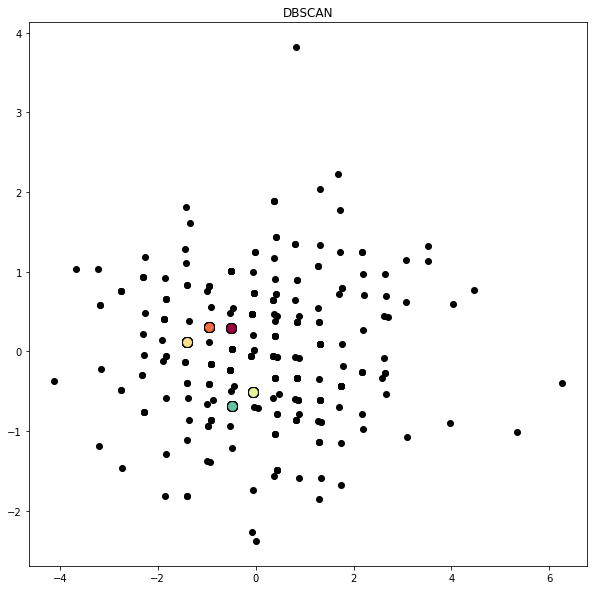

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy
from sklearn import decomposition


X = read[['review_palate','review_appearance','review_aroma','review_taste']].as_matrix()
X = StandardScaler().fit_transform(X)
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
print X


#print X

db = DBSCAN(eps=0.1, min_samples=7).fit(X)
core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_
unique_labels = set(labels)

colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
	xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title("DBSCAN")
plt.show()

In [ ]:
# Setting
import numpy
from matplotlib import pyplot as plt


from sklearn.cluster import AgglomerativeClustering as hac
#from sklearn.cluster import Ward

#Dataset creation
from sklearn import datasets
#iris   = datasets.load_iris()

data   = [iris.data[:, [0,3]], iris.data[:, 0:2], iris.data[:, 2:4], iris.data[:, 1:3], iris.data[:, [0,2]], iris.data[:, [1,3]]]

fig = plt.figure(figsize = (5,5))
fig.suptitle('SUBTITULO')


print data

#Agglomerative Clustering

#clustering = Ward(n_clusters=3, connectivity=None, n_components=None, compute_full_tree='auto')
clustering = hac(linkage = "ward", n_clusters = 3, affinity="euclidean") #se obtiene el mismo resultado
clustering.fit(X)




HAC_labels = clustering.labels_

#Normalization
x_min, x_max = numpy.min(X, axis = 0), numpy.max(X, axis = 0)
X = (X - x_min) / (x_max - x_min)

#Visualitation
ax = fig.add_subplot(2,3,i+1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xticks(())
ax.set_yticks(())
ax.axis([0,1.05,0,1.05])
plt.title('Grafico: %d' % (i+1))

for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(y[i]),
    color=plt.cm.spectral(HAC_labels[i]/10.+0.1),
    fontdict={'weight': 'bold', 'size': 8})

plt.show()